## 使用pandas读取数据

In [3]:
import pandas as pd
# 以第0列为序号
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
# 读取开头5行
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# 最后5行
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [16]:
data.shape

(200, 4)

**上面我们得到了数据，千3列是输入，后一列是输出，到这里还无法随便猜测，所以先将数据可视化展示下**

## 使用seaborn可视化数据

In [6]:
import seaborn as sb

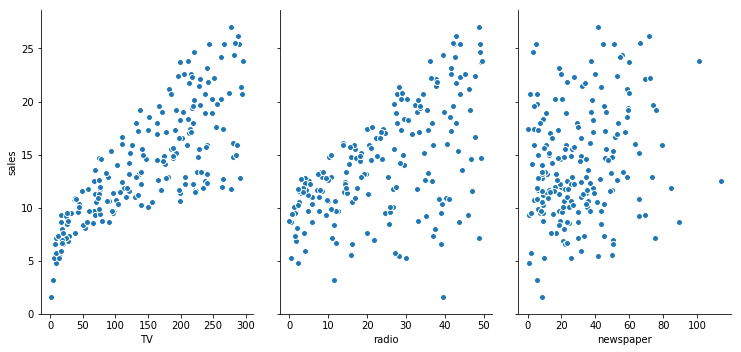

In [26]:
#%matplotlib inline

#help(sb.pairplot)
sb.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=5,aspect=0.7)

**看起来TV和Radio呈线性，newspaper就不知道什么了**

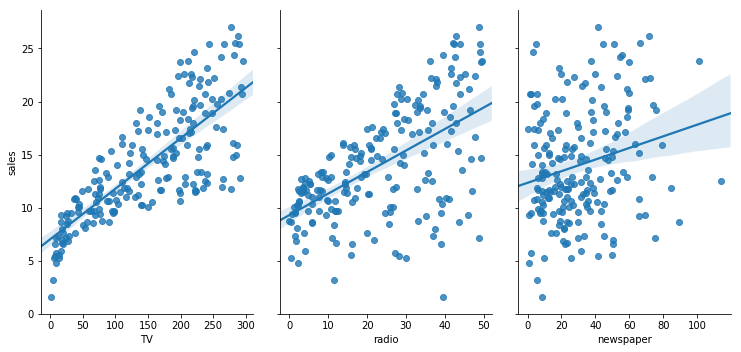

In [27]:
sb.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=5,aspect=0.7,kind='reg')

## 使用pandas准备数据

In [29]:
fetures_col = ['TV','radio','newspaper']
X = data[fetures_col]
print(X.head())
print(X.shape)

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
(200, 3)


In [31]:
#等价于y = data['sales']
y = data.sales
print(y.head())
print(y.shape)
print(type(y))

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64
(200,)
<class 'pandas.core.series.Series'>


## sklearn划分数据

In [32]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [33]:
print(X_train.shape,y_test.shape)

(150, 3) (50,)


## sklearn线性回归

In [34]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 得到参数

In [37]:
print(linreg.coef_)
print(linreg.intercept_)

[ 0.04656457  0.17915812  0.00345046]
2.87696662232


In [38]:
zip(fetures_col,linreg.coef_)

## 评估结果
对于回归分析，不能再用精度直接评估，所以采用以下几种方式：平均差(MAE)，均方差(MSE),标准差(RMSE)

In [39]:
from sklearn import metrics

### 先进行测试

In [40]:
a = [100,90,50,30]
b = [90,90,70,20]

In [41]:
# 平均差
print((10+0+20+10)/4)

print(metrics.mean_absolute_error(a,b))

10.0
10.0


In [42]:
# 均方差
print((10*10+0+20*20+10*10)/4)

print(metrics.mean_squared_error(a,b))

150.0
150.0


In [43]:
# 标准差
import numpy as np

print(np.sqrt((10*10+0+20*20+10*10)/4.))

print(np.sqrt(metrics.mean_squared_error(a,b)))

12.2474487139
12.2474487139


### 评估

In [44]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


看起来还是不错的